## **FASE 4: AB TESTING**

- **Librerías**

In [30]:
# importar librerías

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Libreria Regex para buscar patrones
# -----------------------------------------------------------------------
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Ajusta el ancho de la consola para evitar truncamientos
# -----------------------------------------------------------------------
pd.set_option("display.width", 1000) 

# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
from scipy.stats import levene


# Importar otras librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import csv

In [2]:
df_HR= pd.read_csv("Dataset_HR_final.csv")
df_HR.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work
0,51,No,Unknown,684.0,Research & Development,6,3,Other,1,162.0,1,Male,51.0,3,5,Research Director,3,Unknown,1628.08,6462,7,No,13,3,3,40,0,11.25,5,3.00,20,15,15,1972,19537.0,Yes
1,52,No,Unknown,699.0,Research & Development,1,4,Life Sciences,1,259.0,3,Male,65.0,2,5,Manager,3,Unknown,1666.58,5678,0,No,14,3,1,40,1,34.00,5,3.00,33,11,9,1971,19999.0,Yes
2,42,No,travel rarely,532.0,Research & Development,4,2,Technical Degree,1,319.0,3,Male,58.0,3,5,Manager,4,Married,1602.67,4933,1,No,11,3,4,40,0,22.00,3,2.77,22,11,15,1981,19232.0,Yes
3,47,No,travel rarely,359.0,Research & Development,2,4,Medical,1,1462.0,1,Female,82.0,3,4,Research Director,3,Married,1430.75,26703,3,No,19,3,2,40,2,11.25,2,2.77,20,5,6,1976,17169.0,No
4,48,No,Unknown,117.0,Research & Development,22,3,Medical,1,1900.0,4,Female,58.0,3,4,Manager,4,Unknown,1431.17,2437,3,No,11,3,2,40,1,11.25,3,3.00,22,4,7,1975,17174.0,Yes


Partiremos de la siguiente hipótesis:

H0= empleados con niveles de satisfacción más bajos no tienen una mayor probabilidad de dejar la empresa.

H1= empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa.




Por lo tanto, los pasos que deberás seguir en esta fase son:

1. Divide a los empleados en los grupos A y B según los criterios establecidos.

2. Calcula la tasa de rotación (porcentaje de empleados que dejaron la empresa) en cada grupo.

3. Realiza un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B.

4. Analiza los resultados.

5. Calcular la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo.

In [6]:
# Grupo A (Control): Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 5.
filtro_grupo_a= df_HR["job_satisfaction"]>= 3
grupo_a = df_HR[filtro_grupo_a]
grupo_a.head()


,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work
0,51,No,Unknown,684.0,Research & Development,6,3,Other,1,162.0,1,Male,51.0,3,5,Research Director,3,Unknown,1628.08,6462,7,No,13,3,3,40,0,11.25,5,3.00,20,15,15,1972,19537.0,Yes
1,52,No,Unknown,699.0,Research & Development,1,4,Life Sciences,1,259.0,3,Male,65.0,2,5,Manager,3,Unknown,1666.58,5678,0,No,14,3,1,40,1,34.00,5,3.00,33,11,9,1971,19999.0,Yes
2,42,No,travel rarely,532.0,Research & Development,4,2,Technical Degree,1,319.0,3,Male,58.0,3,5,Manager,4,Married,1602.67,4933,1,No,11,3,4,40,0,22.00,3,2.77,22,11,15,1981,19232.0,Yes
3,47,No,travel rarely,359.0,Research & Development,2,4,Medical,1,1462.0,1,Female,82.0,3,4,Research Director,3,Married,1430.75,26703,3,No,19,3,2,40,2,11.25,2,2.77,20,5,6,1976,17169.0,No
4,48,No,Unknown,117.0,Research & Development,22,3,Medical,1,1900.0,4,Female,58.0,3,4,Manager,4,Unknown,1431.17,2437,3,No,11,3,2,40,1,11.25,3,3.00,22,4,7,1975,17174.0,Yes


In [9]:
# Grupo B (Variante): Empleados con un nivel de satisfacción en el trabajo inferior a 3 en la misma escala.
filtro_grupo_b= df_HR["job_satisfaction"]< 3
grupo_b = df_HR[filtro_grupo_b]
grupo_b.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work
5,59,No,Unknown,1435.0,Sales,25,3,Life Sciences,1,81.0,1,Female,99.0,3,3,Sales Executive,1,Unknown,567.28,2354,7,No,11,3,4,40,0,28.0,3,2.0,21,7,9,1964,6807.38,Yes
11,58,Yes,travel rarely,286.0,Research & Development,2,4,Other,1,825.0,4,Male,31.0,3,5,Research Director,2,Single,1603.83,25761,7,Yes,12,3,4,40,0,40.0,2,3.0,31,13,8,1965,19246.00,No
15,36,No,Unknown,429.0,Research & Development,2,4,Life Sciences,1,1294.0,3,Female,53.0,3,2,Manufacturing Director,2,Single,600.44,2323,9,Yes,11,3,4,40,0,18.0,2,3.0,16,5,12,1987,7205.33,No
20,35,No,Unknown,776.0,Sales,1,4,Marketing,1,100.0,3,Male,32.0,2,2,Sales Executive,1,Single,567.28,23016,0,No,14,3,2,40,0,16.0,2,3.0,15,2,8,1988,6807.38,No
21,46,No,travel rarely,526.0,Sales,1,2,Other,1,244.0,2,Female,92.0,3,3,Sales Executive,1,Divorced,567.28,2137,1,No,25,4,3,40,3,24.0,2,3.0,24,15,7,1977,6807.38,Yes


**Calculo de la tasa de rotación para cada grupo**
- Tasa de rotación(TR)= grupo/total grupo

In [24]:
df_grupo_a= grupo_a.groupby('attrition')["employee_count"].count().reset_index()

df_grupo_a["TR"]= (df_grupo_a["employee_count"]/df_grupo_a["employee_count"].sum()).round(2)
df_grupo_a

,attrition,employee_count,TR
0,No,571,0.86
1,Yes,94,0.14


In [27]:
df_grupo_b= grupo_b.groupby('attrition')["employee_count"].count().reset_index()
df_grupo_b["TR"]= (df_grupo_b["employee_count"]/df_grupo_b["employee_count"].sum()).round(2)
df_grupo_b

,attrition,employee_count,TR
0,No,332,0.8
1,Yes,83,0.2


**Pruebas estadísticas**

*1. Normalidad*

Al tener un conjunto de datos mayor a `50`

### Gráfico de la distribución de los datos

Text(0, 0.5, 'Frecuencia')

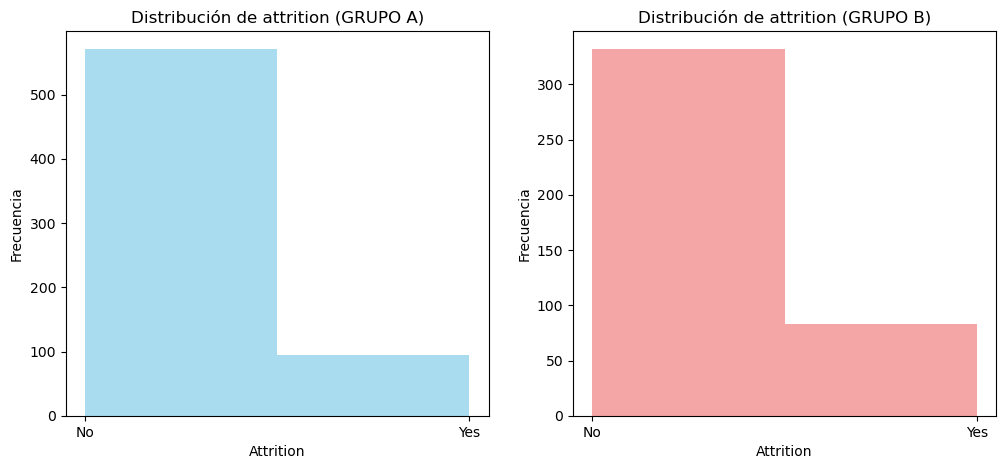

In [43]:
# Crear subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
# Histograma para productos "Producto local"
axes[0].hist(grupo_a['attrition'], bins=2, color='skyblue', alpha=0.7)
axes[0].set_title('Distribución de attrition (GRUPO A)')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Frecuencia')
# Histograma para productos "Buena calidad del producto"
axes[1].hist(grupo_b['attrition'], bins=2, color='lightcoral',alpha=0.7)
axes[1].set_title('Distribución de attrition (GRUPO B)')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('Frecuencia')


In [29]:
# Datos de los dos grupos

# Realizar la prueba KS
statistica_ks, p_valor = stats.ks_2samp(df_grupo_a['TR'],df_grupo_b['TR'])

# Resultados
print("Estadística KS:", statistica_ks)
print("P-Valor:", p_valor)

if p_valor < 0.05:
    print("Las distribuciones son diferentes.")
else:
    print("Las distribuciones son similares.")

Estadística KS: 0.5
P-Valor: 1.0
Las distribuciones son similares.


In [44]:
# Datos de los dos grupos

# Realizar la prueba KS
statistica_ks, p_valor = stats.ks_2samp(grupo_a['attrition'],grupo_b['attrition'])

# Resultados
print("Estadística KS:", statistica_ks)
print("P-Valor:", p_valor)

if p_valor < 0.05:
    print("Las distribuciones son diferentes.")
else:
    print("Las distribuciones son similares.")

Estadística KS: 0.058646616541353384
P-Valor: 0.32695036562661495
Las distribuciones son similares.


*2.Homogeneidad de varianza*

Prueba de Levene, ya que tenemos dos grupos 

In [31]:
stat, p_val = levene(df_grupo_a['TR'],df_grupo_b['TR'])
print("P-valor de Levene:", p_val)

P-valor de Levene: 4.279844320860534e-31


In [50]:
df_grupo_b.describe()

,employee_count,TR
count,2.000000,2.000000
mean,207.500000,0.500000
std,176.069589,0.424264
min,83.000000,0.200000
25%,145.250000,0.350000
50%,207.500000,0.500000
75%,269.750000,0.650000
max,332.000000,0.800000


In [51]:
df_grupo_a.describe()

,employee_count,TR
count,2.000000,2.000000
mean,332.500000,0.500000
std,337.289935,0.509117
min,94.000000,0.140000
25%,213.250000,0.320000
50%,332.500000,0.500000
75%,451.750000,0.680000
max,571.000000,0.860000


R: P-valor de los grupos es < 0.05 por lo que concluimos que las varianzas no son iguales, es decir, existen diferencias significativas en las varianzas de los grupos a y b.

<Axes: xlabel='TR'>

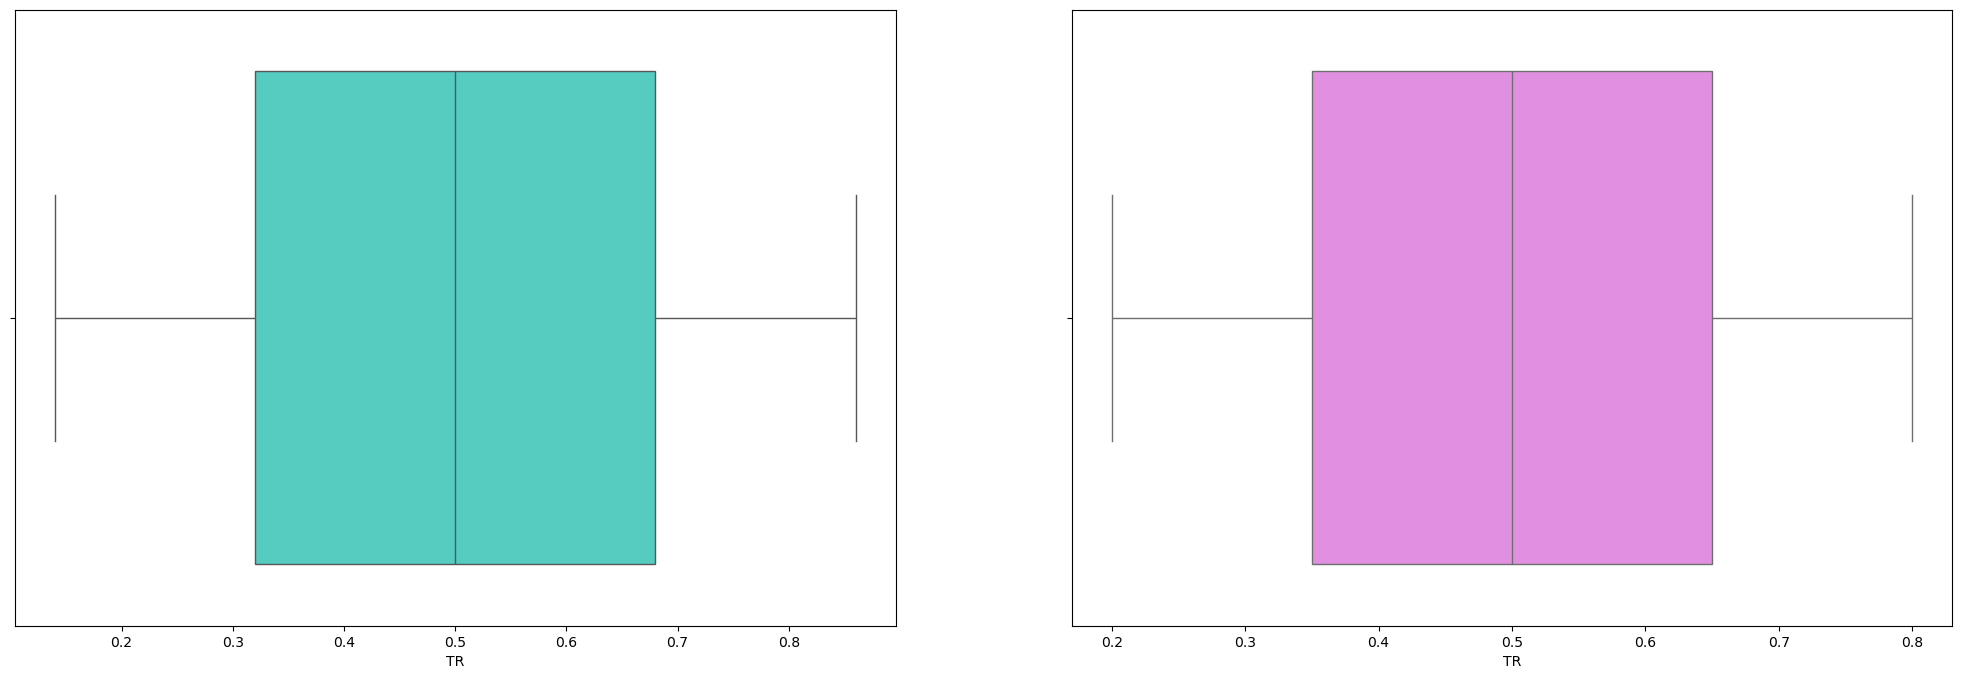

In [49]:
# Crear el subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 8))  # Aumenta el tamaño de la figura

# Primer boxplot
sns.boxplot(x="TR",
            data=df_grupo_a,
            width=0.8,
            color="turquoise",
            ax=axes[0])

# Segundo boxplot
sns.boxplot(x="TR",
            data=df_grupo_b,
            width=0.8,
            color="violet",
            ax=axes[1])

# Ajustar límites de los ejes para ver los cuartiles mejo

*3.Independiencia*

In [ ]:
# Visualizar la matriz de correlación con tamaño ajustado
correlacion_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
sns.heatmap(correlacion_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Realizar la prueba de chi-cuadrado para evaluar la independencia de dos variables categóricas
contingency_table = pd.crosstab(df['campaign_name'], df['date'])
chi2, p_chi2, _, _ = chi2_contingency(contingency_table)
print(f"Prueba de Chi-cuadrado - p-valor: {p_chi2}")

# Realizar una prueba t para comparar las medias de dos grupos (por ejemplo, Control vs. Test)
control_group = df[df['campaign_name'] == 'Control Campaign']
test_group = df[df['campaign_name'] == 'Test Campaign']
t_stat, p_ttest = ttest_ind(control_group['CTR'], test_group['CTR'])
print(f"Prueba t para CTR entre Control y Test - p-valor: {p_ttest}")